In [290]:
import sys, os, os.path
import glob
import math

In [291]:
import scipy as sp
import numpy as np

import matplotlib
import matplotlib.pyplot as pp

In [292]:
import yt
from yt.frontends.boxlib.data_structures import AMReXDataset

In [293]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [300]:
data_root = "/home/malvarado/FHDeX/exec/immersed_boundary"
data_dir  = "channel_soft"

In [301]:
data_path = os.path.join(data_root, data_dir)

In [302]:
n_fill   = 5
prefix   = "plt"
file_fmt = prefix + "{:0" + str(n_fill) + "d}"

In [303]:
data_glob  = os.path.join(data_path, prefix + "*")
data_files = glob.glob(data_glob)
data_files.sort()

In [304]:
data_files

['/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000000',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000001',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000002',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000003',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000004',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000005',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000006',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000007',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000008',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000009',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000010',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000011',
 '/home/malvarado/FHDeX/exec/immersed_boundary/channel_soft/plt0000012']

### Replace "phi" with "concentration" in plt header file (yt doesn't like phi...)
def substitute_header(plt_file, source="phi", target="concentration"):
    
    # load header file
    header_file = os.path.join(plt_file, "Header")
    with open(header_file, "r") as f:
        header_orig = f.readlines()
    
    # select variable lables
    n_lables   = int(header_orig[1])
    l_offset   = 2
    
    # make a backup copy(iff the source was found in original)
    if source+"\n" in header_orig:
        header_cpy  = os.path.join(plt_file, "Header.backup")
        with open(header_cpy, "w") as f:
            for line in header_orig:
                f.write(line)
    
    # replace source with target
    for i in range(l_offset, n_lables+l_offset):
        if header_orig[i] == source+"\n":
            header_orig[i] = target+"\n"
    
    # save substituted file in place of original
    with open(header_file, "w") as f:
        for line in header_orig:
            f.write(line)

def plot_frame(index, data_files, n_fill):
    prefix   = "frame_"
    file_fmt = prefix + "{:0" + str(n_fill) + "d}.png"
    
    # legacy
    substitute_header(data_files[index])
    
    ds = yt.load(data_files[index])
    
    slc = yt.SlicePlot(ds, "x", "concentration")
    slc.set_log("concentration", False)
    slc.set_zlim("concentration", 1e-100, 1e-5)
    
    #slc.show()
    slc.save(file_fmt.format(index))

# for i in range(0, len(data_files)):
    plot_frame(i, data_files, 4)

In [103]:
# to stitch together the movie:
#    ffmpeg -pattern_type glob -i "frame_*.png" movie.mpeg

num_frames = 200
for i in range(num_frames):
    #cam.rotate(2.0*np.pi/num_frames)
    #sc.render()
    ds = yt.load(data_files[i])    
    slc = yt.SlicePlot(ds, "z", "C")
    slc.zoom(2)
    slc.set_log("C", False)
    slc.set_zlim("C", 1e-100, 7e-4)
    slc.annotate_quiver('averaged_velx', 'averaged_vely',scale=0.3)
    #slc.show()
    slc.save('velocityquiver_%.4d.png' % i)

yt : [INFO     ] 2019-07-31 14:55:10,752 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-07-31 14:55:10,753 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-31 14:55:10,754 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-31 14:55:10,763 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-31 14:55:11,353 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:55:11,354 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:55:11,355 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:55:11,357 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:55:11,359 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:613: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(*ax.dataLim.intervalx)
/home/malvarado/anaconda3/lib/python3.7/site

yt : [INFO     ] 2019-07-31 14:55:27,107 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:55:27,120 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:55:27,124 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:55:27,128 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-31 14:55:27,467 Plot image for field ('boxlib', 'C') has both positive and negative values. Min = -0.000000, Max = 0.000004.
yt : [WARNING  ] 2019-07-31 14:55:27,490 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-07-31 14:55:28,396 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [INFO     ] 2019-07-31 14:55:28,912 Saving plot velocityquiver_0005.png
yt : [INFO     ] 2019-07-31 14:55:29,933 Parameters: current_time              = 0.0006000000000000001
yt : [INFO     ] 2019-07-31 14:55:29,934 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-31 14:55:29,935 Paramete

yt : [INFO     ] 2019-07-31 14:55:49,182 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-31 14:55:49,755 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:55:49,762 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:55:49,764 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:55:49,765 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:55:49,767 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-31 14:55:49,935 Plot image for field ('boxlib', 'C') has both positive and negative values. Min = -0.000000, Max = 0.000018.
yt : [WARNING  ] 2019-07-31 14:55:49,937 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-07-31 14:55:50,778 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [INFO     ] 2019-07-31 14:55:51,653 Saving plot velocityquiver_0012.png
yt : [INFO     ] 2019-07-31 14:55:52,916 Parameters: current_time              = 0.001

yt : [INFO     ] 2019-07-31 14:56:13,418 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-31 14:56:13,424 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-31 14:56:13,427 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-31 14:56:14,100 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:56:14,110 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:56:14,112 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:56:14,120 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:56:14,129 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-31 14:56:14,306 Plot image for field ('boxlib', 'C') has both positive and negative values. Min = -0.000000, Max = 0.000036.
yt : [WARNING  ] 2019-07-31 14:56:14,332 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-07-31 14:56:15,233 Making a fixed resolution buffer of (('boxli

yt : [INFO     ] 2019-07-31 14:56:34,883 Parameters: current_time              = 0.0025999999999999994
yt : [INFO     ] 2019-07-31 14:56:34,884 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-31 14:56:34,885 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-31 14:56:34,886 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-31 14:56:35,212 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:56:35,219 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:56:35,221 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:56:35,222 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:56:35,224 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-31 14:56:35,362 Plot image for field ('boxlib', 'C') has both positive and negative values. Min = -0.000000, Max = 0.000053.
yt : [WARNING  ] 2019-07-31 14:56:35,376 Switching to symlog colorbar scaling unless linear scaling i

yt : [INFO     ] 2019-07-31 14:56:47,360 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning: overflow encountered in double_scalars
  return vmin * np.ma.power((vmax / vmin), val)
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1047: RuntimeWarning: overflow encountered in double_scalars
  return vmin * pow((vmax / vmin), value)
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:613: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(*ax.dataLim.intervalx)
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:614: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(*ax.dataLim.intervaly)
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:301

yt : [INFO     ] 2019-07-31 14:56:57,724 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:56:57,738 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:56:57,743 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:56:57,751 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:56:57,753 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning: overflow encountered in double_scalars
  return vmin * np.ma.power((vmax / vmin), val)
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1047: RuntimeWarning: overflow encountered in double_scalars
  return vmin * pow((vmax / vmin), value)
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:613: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(*ax.dataLim.intervalx)
/home/malvarado/anaconda3/lib/python3.7/sit

yt : [INFO     ] 2019-07-31 14:57:07,527 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-31 14:57:07,528 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-31 14:57:07,529 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-31 14:57:07,791 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:57:07,793 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:57:07,795 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:57:07,796 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:57:07,798 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1045: RuntimeWarning: overflow encountered in double_scalars
  return vmin * np.ma.power((vmax / vmin), val)
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1047: RuntimeWarning: overflow encountered in double_scalars
  return vmin * pow((vmax / vmin),

yt : [INFO     ] 2019-07-31 14:57:15,214 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [INFO     ] 2019-07-31 14:57:16,063 Saving plot velocityquiver_0041.png
yt : [INFO     ] 2019-07-31 14:57:17,100 Parameters: current_time              = 0.004199999999999998
yt : [INFO     ] 2019-07-31 14:57:17,101 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-31 14:57:17,102 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-31 14:57:17,103 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-31 14:57:17,364 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:57:17,365 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:57:17,367 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:57:17,368 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:57:17,369 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colo

/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:302: RuntimeWarning: divide by zero encountered in log10
  (np.log10(ticks) <= np.log10(vmax) + rtol)]
yt : [INFO     ] 2019-07-31 14:57:25,148 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [INFO     ] 2019-07-31 14:57:25,742 Saving plot velocityquiver_0045.png
yt : [INFO     ] 2019-07-31 14:57:26,434 Parameters: current_time              = 0.004599999999999999
yt : [INFO     ] 2019-07-31 14:57:26,437 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-31 14:57:26,440 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-31 14:57:26,443 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-31 14:57:26,705 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:57:26,710 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:57:26,714 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 14:57:26,717 ylim = 0.000000 1.00

/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:301: RuntimeWarning: divide by zero encountered in log10
  ticks = ticks[(np.log10(ticks) >= np.log10(vmin) - rtol) &
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:302: RuntimeWarning: divide by zero encountered in log10
  (np.log10(ticks) <= np.log10(vmax) + rtol)]
yt : [INFO     ] 2019-07-31 14:57:37,605 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [INFO     ] 2019-07-31 14:57:38,437 Saving plot velocityquiver_0049.png
yt : [INFO     ] 2019-07-31 14:57:39,335 Parameters: current_time              = 0.005
yt : [INFO     ] 2019-07-31 14:57:39,336 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-31 14:57:39,338 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-31 14:57:39,339 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-31 14:57:39,596 xlim = 0.000000 1.000000
yt : [INFO   

/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:614: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(*ax.dataLim.intervaly)
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:301: RuntimeWarning: divide by zero encountered in log10
  ticks = ticks[(np.log10(ticks) >= np.log10(vmin) - rtol) &
/home/malvarado/anaconda3/lib/python3.7/site-packages/matplotlib/colorbar.py:302: RuntimeWarning: divide by zero encountered in log10
  (np.log10(ticks) <= np.log10(vmax) + rtol)]
yt : [INFO     ] 2019-07-31 14:57:48,910 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [INFO     ] 2019-07-31 14:57:49,756 Saving plot velocityquiver_0053.png
yt : [INFO     ] 2019-07-31 14:57:50,711 Parameters: current_time              = 0.005400000000000001
yt : [INFO     ] 2019-07-31 14:57:50,712 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019

IndexError: list index out of range

In [305]:


#yt.define_unit("millimeter", (1.0, "cm"))


ds = yt.load(data_files[-1])


yt : [INFO     ] 2019-07-31 16:50:05,434 Parameters: current_time              = 0.0012000000000000003
yt : [INFO     ] 2019-07-31 16:50:05,439 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-31 16:50:05,440 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-31 16:50:05,441 Parameters: domain_right_edge         = [1. 1. 1.]


In [306]:
ds.field_list

[('boxlib', 'C'),
 ('boxlib', 'averaged_velx'),
 ('boxlib', 'averaged_vely'),
 ('boxlib', 'averaged_velz'),
 ('boxlib', 'dCdx'),
 ('boxlib', 'dCdx_cen'),
 ('boxlib', 'dCdy'),
 ('boxlib', 'dCdy_cen'),
 ('boxlib', 'dCdz'),
 ('boxlib', 'dCdz_cen'),
 ('boxlib', 'divergence'),
 ('boxlib', 'force_ibm_x'),
 ('boxlib', 'force_ibm_y'),
 ('boxlib', 'force_ibm_z'),
 ('boxlib', 'pres'),
 ('boxlib', 'shifted_force_ibm_x'),
 ('boxlib', 'shifted_force_ibm_y'),
 ('boxlib', 'shifted_force_ibm_z'),
 ('boxlib', 'shifted_velx'),
 ('boxlib', 'shifted_vely'),
 ('boxlib', 'shifted_velz'),
 ('boxlib', 'tracer'),
 ('boxlib', '|Dc|')]

yt : [INFO     ] 2019-07-31 16:50:09,641 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 16:50:09,644 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 16:50:09,655 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 16:50:09,659 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 16:50:09,664 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-31 16:50:09,996 Plot image for field ('boxlib', 'C') has both positive and negative values. Min = -0.000000, Max = 0.000115.
yt : [WARNING  ] 2019-07-31 16:50:10,022 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-07-31 16:50:10,881 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800



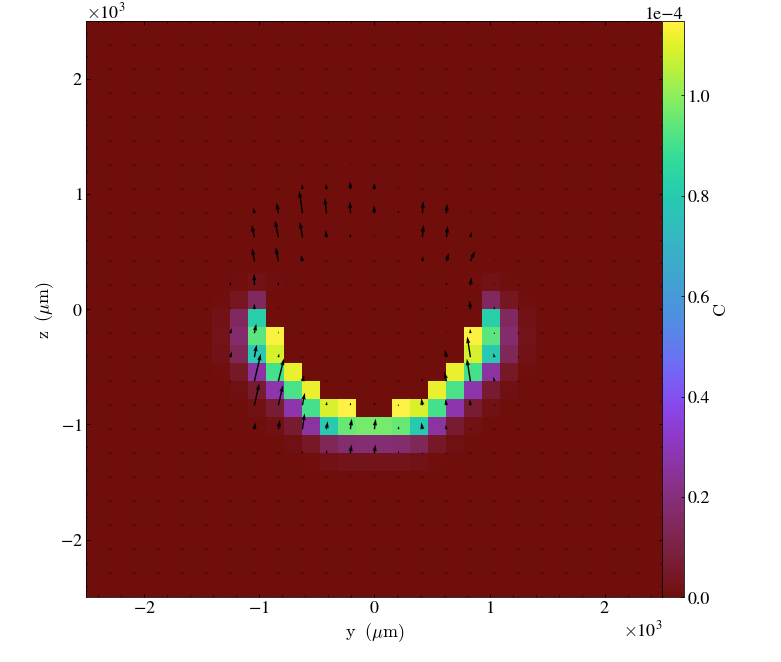

In [307]:
slc = yt.SlicePlot(ds, "x", "C")
slc.set_log("C", False)
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)
slc.annotate_quiver('force_ibm_y', 'force_ibm_z',scale=200, factor=32)
slc.zoom(2)
slc.show()

yt : [INFO     ] 2019-07-31 16:50:53,722 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 16:50:53,723 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 16:50:53,725 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 16:50:53,726 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 16:50:53,728 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800
yt : [WARNING  ] 2019-07-31 16:50:54,144 Plot image for field ('boxlib', 'C') has both positive and negative values. Min = -0.000000, Max = 0.000115.
yt : [WARNING  ] 2019-07-31 16:50:54,154 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2019-07-31 16:50:55,384 Making a fixed resolution buffer of (('boxlib', 'C')) 800 by 800



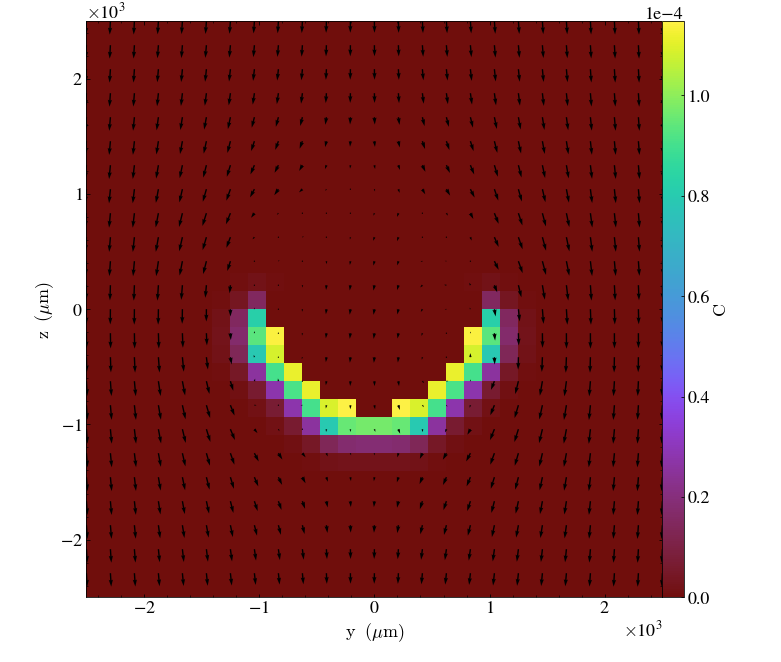

In [310]:
slc = yt.SlicePlot(ds, "x", "C")
slc.set_log("C", False)
#width=(10.,"mm")
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)
slc.annotate_quiver('averaged_vely', 'averaged_velz',scale=0.05,factor=32)
slc.zoom(2)
slc.show()
#slc.save("step_0.png")

In [287]:
num_frames = 200
for i in range(num_frames):
    #cam.rotate(2.0*np.pi/num_frames)
    #sc.render()
    ds = yt.load(data_files[i]) 

    slc = yt.SlicePlot(ds, "z", "|Dc|")
    slc.set_log("|Dc|", False)
    slc.set_zlim("|Dc|", 1e-100, 8e-3)
    slc.annotate_quiver('dCdx_cen', 'dCdy_cen',scale=0.15)
    slc.zoom(2)
    #slc.show()
    slc.save('gradientquiver_%.4d.png' % i)

yt : [INFO     ] 2019-07-31 16:47:46,212 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-07-31 16:47:46,215 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-07-31 16:47:46,216 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-31 16:47:46,217 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-31 16:47:46,840 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 16:47:46,854 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 16:47:46,859 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 16:47:46,866 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 16:47:46,869 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [WARNING  ] 2019-07-31 16:47:46,981 Plot image for field ('boxlib', '|Dc|') has zero dynamic range. Min = Max = 0.000000.
yt : [WARNING  ] 2019-07-31 16:47:47,003 Switching to linear colorbar scaling.
yt : [INFO     ] 2019-07-31 16:47:47,650 Making a fixed reso

IndexError: list index out of range

yt : [INFO     ] 2019-07-31 16:48:36,384 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 16:48:36,385 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 16:48:36,387 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 16:48:36,388 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-31 16:48:36,390 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800
yt : [INFO     ] 2019-07-31 16:48:37,275 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800



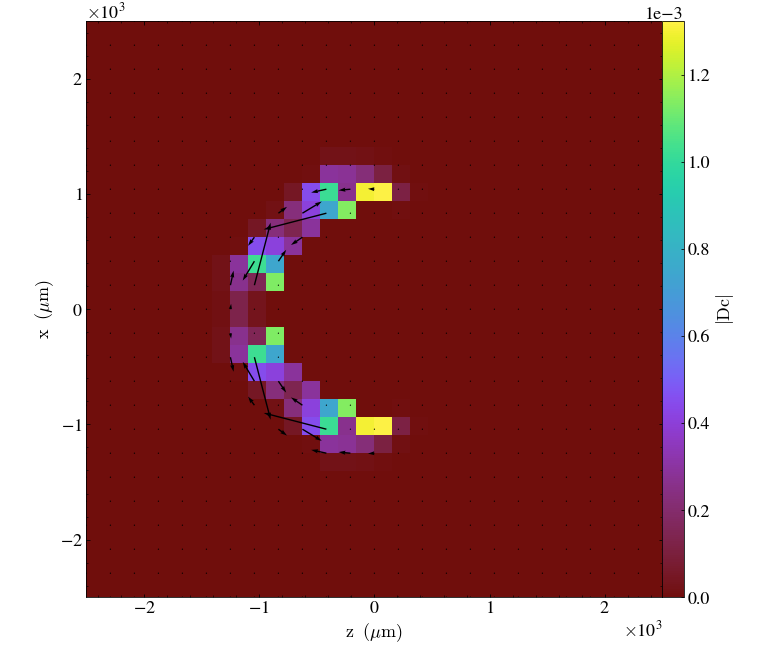

In [289]:
 slc = yt.SlicePlot(ds, "y", "|Dc|")
slc.set_log("|Dc|", False)
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)
#slc.annotate_quiver('slipvel_x', 'slipvel_y',scale=1)
slc.zoom(2)
slc.annotate_quiver('dCdz_cen', 'dCdx_cen',scale=0.01, factor=32)
slc.show()

In [ ]:
#sc = yt.create_scene(ds, 'C')
im, sc = yt.volume_render(ds, 'C')
sc.show()

In [ ]:
slc = yt.SlicePlot(ds, "y", "dCdz_cen")
slc.set_log("dCdz_cen", False)
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)

slc.show()
#slc.save("step_0.png")

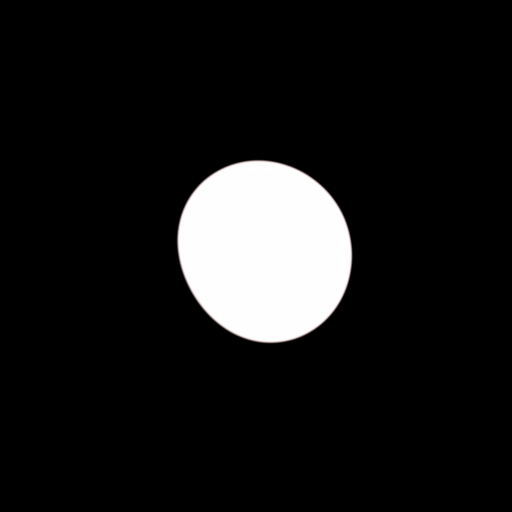

In [92]:
sc.camera.width = (300, 'kpc')
sc.show()


In [ ]:
slc.annotate_quiver('dCdx_cen', 'dCdy_cen')

yt : [INFO     ] 2019-07-17 10:53:32,733 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 10:53:32,736 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 10:53:32,740 xlim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 10:53:32,743 ylim = 0.000000 1.000000
yt : [INFO     ] 2019-07-17 10:53:32,748 Making a fixed resolution buffer of (('boxlib', '|Dc|')) 800 by 800



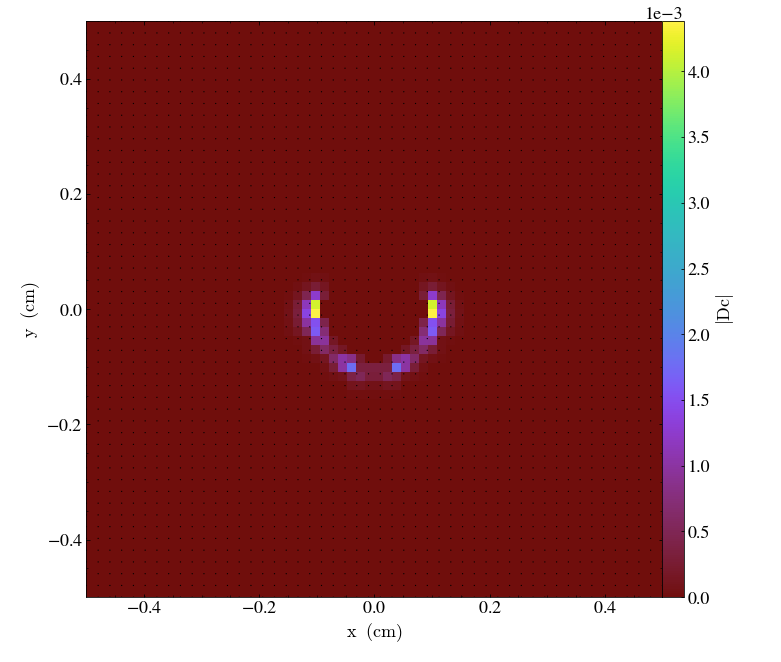

In [161]:
slc = yt.SlicePlot(ds, "z", "|Dc|")
slc.set_log("|Dc|", False)
#slc.set_zlim("Dcon_N", 1e-100, 8e-6)
slc.annotate_quiver('dCdx_cen', 'dCdy_cen',scale=100000)
slc.show()

(x,  y,  z) C
-----------------------


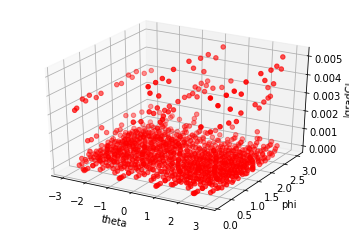

In [162]:
sp= ds.sphere("c", (.1, "cm"))
p=sp["C"]
import array

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import matplotlib.pyplot as plt

#phi1= np.zeros(len(C), dtype = float)#np.array('d');
#theta1= np.zeros(len(C), dtype = float)
#C1= np.zeros(len(C), dtype = float)
#Cdx1= np.zeros(len(C), dtype = float)
#Cdy1= np.zeros(len(C), dtype = float)
#Cdz1= np.zeros(len(C), dtype = float)
phi1=array.array('d');
theta1=array.array('d');
C1=array.array('d');
Cdx1=array.array('d');
Cdy1=array.array('d');
Cdz1=array.array('d');
gradCmag1=array.array('d');
from yt.units import cm
cen=0.5*cm
#print(p)
#plot(p)
#plot = yt.ProfilePlot(p, "radius", "C")

#plot = yt.ProfilePlot(sp,"Psi", "C")

print("(x,  y,  z) C")

print("-----------------------")
for count in range(sp["C"].size):
   j=count
   k=count
   i=count
   phi=(math.acos((sp["z"][k]-cen)/math.sqrt((sp["x"][i]-cen)**2+(sp["y"][j]-cen)**2+(sp["z"][k]-cen)**2)))
   theta=(math.atan2((sp["y"][j]-cen),(sp["x"][i]-cen)))
   gradCmag=math.sqrt((sp["dCdx"][j])**2+(sp["dCdy"][k])**2+(sp["dCdz"][i])**2)
   phi1.append(phi)
   theta1.append(theta)
   #print( theta, sp["y"][j]-cen, sp["x"][i]-cen, (sp["y"][j]-cen)/(sp["x"][i]-cen) )
  # print( math.sqrt((sp["x"][i]-cen)**2+(sp["y"][j]-cen)**2+(sp["z"][k]-cen)**2))
   C1.append(sp["C"][count])
   Cdx1.append(sp["dCdx"][count])
   Cdy1.append(sp["dCdy"][count])
   Cdz1.append(sp["dCdz"][count])
   gradCmag1.append(gradCmag)
  # print("(%f,  %f,  %f)    %f", (phi1, theta1, sp["C"][i]))
    
    #phi1=math.acos((sp["x"][i])/sp["z"][i])
#plot.set_unit('radius', 'cm')
#p.show()
#vec1=numpy.argsort(phi1)
#print(vec1)
#C2 = np.zeros(len(vec1), dtype = float) 
#for i in range(0, len(vec1)): 
#    C2[i]= C1[vec1[i]] 
    #print('Sorted array->', C1[vec1[i]]) 
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data.

# Plot the surface.
#surf = ax.plot_surface(phi1, theta1, Cdx1, linewidth=0, antialiased=False)#, cmap=cm.coolwarm,
                      # )
ax.scatter(theta1, phi1, gradCmag1, c='r', marker='o')
ax.set_xlabel('theta')
ax.set_ylabel('phi')
ax.set_zlabel('|gradC|')
plt.show()

#plt.scatter(phi1, Cdy1)
#axes = plt.gca()
#axes.set_xlim([0, 3.14])
#axes.set_ylim([-0.003,0.003])

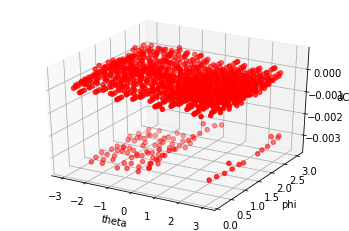

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta1, phi1, Cdy1, c='r', marker='o')
ax.set_xlabel('theta')
ax.set_ylabel('phi')
ax.set_zlabel('dCdx')
plt.show()

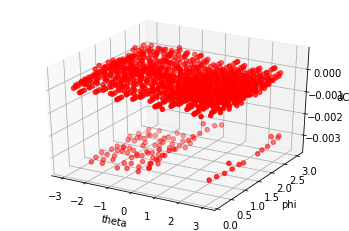

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta1, phi1, Cdy1, c='r', marker='o')
ax.set_xlabel('theta')
ax.set_ylabel('phi')
ax.set_zlabel('dCdy')
plt.show()

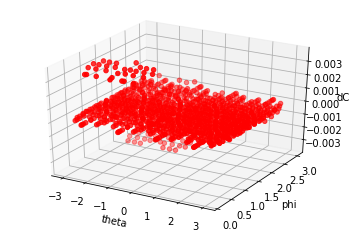

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta1, phi1, Cdz1, c='r', marker='o')
ax.set_xlabel('theta')
ax.set_ylabel('phi')
ax.set_zlabel('dCdz')
plt.show()